In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

# Load the data
data = pd.read_csv("insurance.csv")

In [3]:

# Encode categorical variables
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)


In [4]:

# Prepare the data
X = data[['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]
X = (X - X.mean()) / X.std()
X = np.column_stack((np.ones(X.shape[0]), X))
y = data['charges']


In [5]:

# Initialize weights
weights = np.zeros(X.shape[1])


In [6]:

# Define the predict function
def predict(X, weights):
    return np.dot(X, weights)



In [7]:

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    for i in range(num_iterations):
        predictions = predict(X, weights)
        error = y - predictions
        gradient = -2 * np.dot(X.T, error) / len(y)
        weights -= learning_rate * gradient



In [8]:
# Train the model
learning_rate = 0.001
num_iterations = 1000
gradient_descent(X, y, weights, learning_rate, num_iterations)

# Make predictions
y_pred = predict(X, weights)


In [9]:

# Evaluate the model
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (mse / np.var(y))
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 41933171.19436112
R-squared: 0.7138502827691098


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


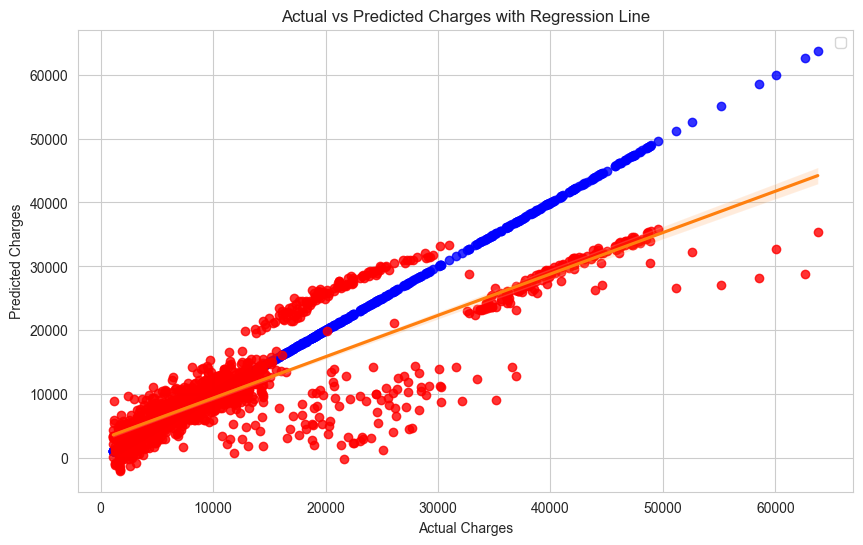

In [10]:

# Plot the results with a legend
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot actual data points in blue with label "Actual"
sns.regplot(x=y, y=y, fit_reg=False, scatter_kws={"color": "blue", "label": "Actual"})

# Plot predicted data points in red with label "Predicted"
sns.regplot(x=y, y=y_pred, scatter_kws={"color": "red", "label": "Predicted"})

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges with Regression Line")
plt.legend()
plt.show()